In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu\n"
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất\n"
from tensorflow.keras.models import load_model #tải mô hình\n"

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào\n",
from keras.layers import LSTM #học phụ thuộc\n",
from keras.layers import Dropout #tránh học tủ\n",
from keras.layers import Dense #đầu ra\n",

#kiểm tra độ chính xác của mô hình\n",
from sklearn.metrics import r2_score #đo mức độ phù hợp\n",
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình\n",
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình"

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [85]:
df = pd.read_csv("/content/gdrive/MyDrive/FORTFOLIO/Dữ liệu Lịch sử HPG.csv")
df


,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,31/12/2024,"26,650.0","26,750.0","26,750.0","26,600.0",10.25M,-0.37%
1,30/12/2024,"26,750.0","26,800.0","26,850.0","26,650.0",12.17M,-0.37%
2,27/12/2024,"26,850.0","27,000.0","27,000.0","26,800.0",11.39M,-0.56%
3,26/12/2024,"27,000.0","27,150.0","27,200.0","26,850.0",9.98M,-0.55%
4,25/12/2024,"27,150.0","26,750.0","27,150.0","26,750.0",17.14M,1.69%
...,...,...,...,...,...,...,...
993,08/01/2021,"23,833.8","23,917.4","24,140.4","23,750.2",35.06M,-0.12%
994,07/01/2021,"23,861.7","24,056.8","24,084.7","23,555.1",38.23M,0.00%
995,06/01/2021,"23,861.7","23,694.4","24,140.4","23,582.9",31.50M,1.06%
996,05/01/2021,"23,610.8","23,304.2","23,861.7","23,248.4",32.70M,0.12%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ngày        998 non-null    object
 1   Lần cuối    998 non-null    object
 2   Mở          998 non-null    object
 3   Cao         998 non-null    object
 4   Thấp        998 non-null    object
 5   KL          998 non-null    object
 6   % Thay đổi  998 non-null    object
dtypes: object(7)
memory usage: 54.7+ KB


In [ ]:
df.isnull().sum()

,0
Ngày,0
Lần cuối,0
Mở,0
Cao,0
Thấp,0
KL,0
% Thay đổi,0


In [86]:
df.describe()

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
count,998,998,998,998,998,998,998
unique,998,553,533,536,556,894,518
top,31/12/2024,"18,909.0","25,818.0","25,545.0","19,636.0",22.55M,0.00%
freq,1,10,7,9,11,4,57


In [ ]:
df.index=pd.to_datetime(df['Ngày'])
df.head()


<ipython-input-7-271a133a5e7e>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.index=pd.to_datetime(df['Ngày'])


,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,,
2024-12-31,31/12/2024,"26,650.0","26,750.0","26,750.0","26,600.0",10.25M,-0.37%
2024-12-30,30/12/2024,"26,750.0","26,800.0","26,850.0","26,650.0",12.17M,-0.37%
2024-12-27,27/12/2024,"26,850.0","27,000.0","27,000.0","26,800.0",11.39M,-0.56%
2024-12-26,26/12/2024,"27,000.0","27,150.0","27,200.0","26,850.0",9.98M,-0.55%
2024-12-25,25/12/2024,"27,150.0","26,750.0","27,150.0","26,750.0",17.14M,1.69%


In [ ]:
# Sort by the index which is already 'Ngày'
df.sort_index(inplace=True, ascending=True)
df.head()

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,,
2021-01-04,04/01/2021,"23,582.9","23,415.7","23,973.2","23,220.5",27.79M,2.05%
2021-01-05,05/01/2021,"23,610.8","23,304.2","23,861.7","23,248.4",32.70M,0.12%
2021-01-06,06/01/2021,"23,861.7","23,694.4","24,140.4","23,582.9",31.50M,1.06%
2021-01-07,07/01/2021,"23,861.7","24,056.8","24,084.7","23,555.1",38.23M,0.00%
2021-01-08,08/01/2021,"23,833.8","23,917.4","24,140.4","23,750.2",35.06M,-0.12%


In [ ]:
df['Lần cuối'] = df['Lần cuối'].str.replace(',', '')
df['Lần cuối'] = df['Lần cuối'].astype(float)

df['Mở'] = df['Mở'].str.replace(',', '')
df['Mở'] = df['Mở'].astype(float)

df['Cao'] = df['Cao'].str.replace(',', '')
df['Cao'] = df['Cao'].astype(float)

df['Thấp'] = df['Thấp'].str.replace(',', '')
df['Thấp'] = df['Thấp'].astype(float)

df['KL'] = df['KL'].str.replace('M', '')
df['KL'] = pd.to_numeric(df['KL'])*1000000

In [ ]:
df.head()

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
Ngày,,,,,,,
2021-01-04,04/01/2021,23582.9,23415.7,23973.2,23220.5,27790000.0,2.05%
2021-01-05,05/01/2021,23610.8,23304.2,23861.7,23248.4,32700000.0,0.12%
2021-01-06,06/01/2021,23861.7,23694.4,24140.4,23582.9,31500000.0,1.06%
2021-01-07,07/01/2021,23861.7,24056.8,24084.7,23555.1,38230000.0,0.00%
2021-01-08,08/01/2021,23833.8,23917.4,24140.4,23750.2,35060000.0,-0.12%


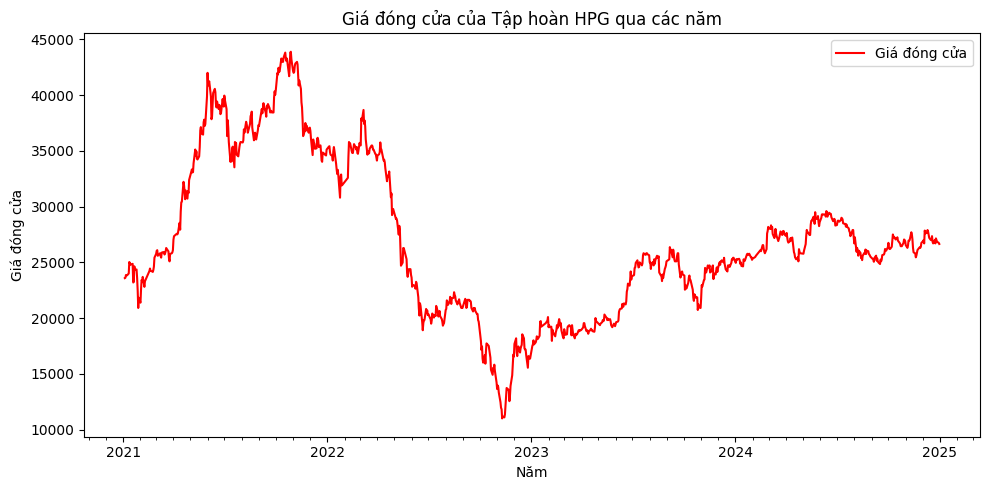

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator

# Tao do thi gia dong cua qua cac nam
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Lần cuối'],label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Giá đóng cửa của Tập hoàn HPG qua các năm')
plt.legend(loc='best')

#Dinh dang do thi hien thi ngay thang theo nam thang
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()   #Them dong nay de khai bao MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

<Axes: xlabel='Ngày'>

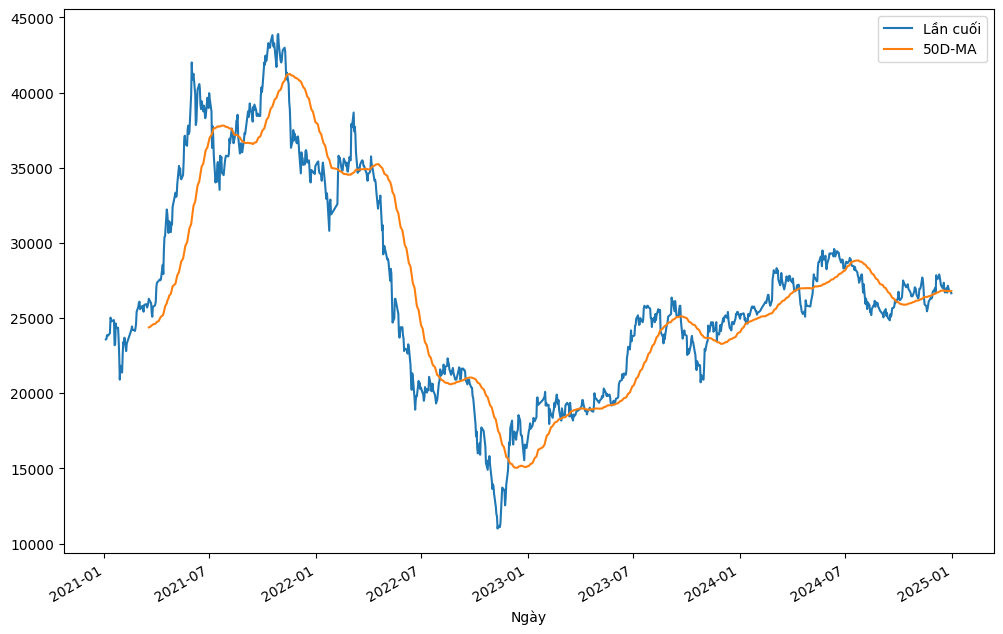

In [ ]:
# Giả sử thêm cột thể hiện giá trung bình 50 ngày (50D-MA) của cổ phiếu HPG
df['50D-MA'] = df['Lần cuối'].rolling(50).mean()

#Sau đó plot giá 'Open' và '50D-MA'
df[['Lần cuối','50D-MA']].plot(figsize=(12,8))    # Luu y co >=2 brackets: [[]]

<Axes: ylabel='Frequency'>

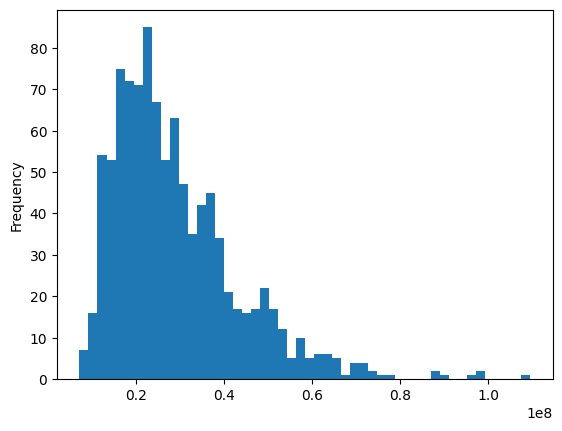

In [ ]:
df['KL'].plot.hist(bins=50)

In [ ]:
#kiem tra ngay co gia dong cao nhat
df['Lần cuối'].idxmax()

Timestamp('2021-10-28 00:00:00')

In [ ]:
#gia dong cao nhat
df['Lần cuối'].max()

43895.8

<Axes: title={'center': 'Trading Value'}, xlabel='Ngày'>

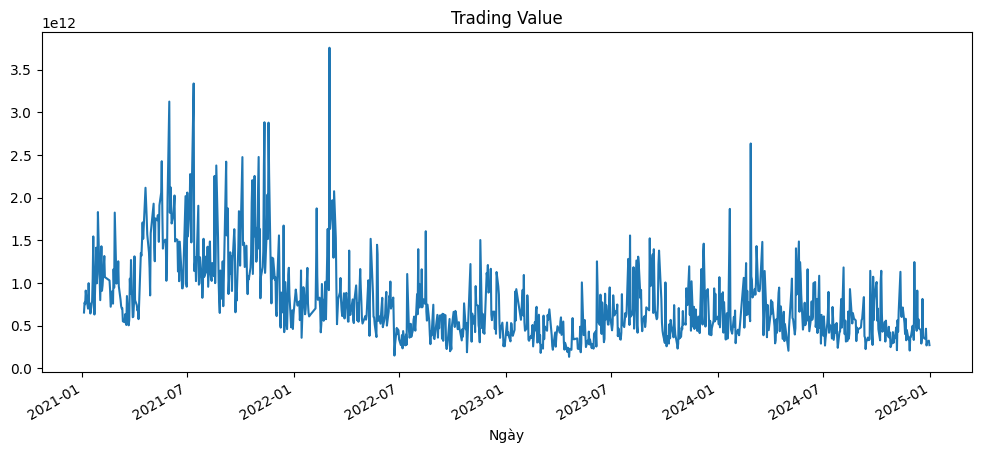

In [ ]:
df['Trading Value']=df['Lần cuối']*df['KL']
df['Trading Value'].plot(figsize=(12,5),label='HPG',title = 'Trading Value')

In [ ]:
#kiem tra ngay co gia dong thap nhat
df['Lần cuối'].idxmin()

Timestamp('2022-11-10 00:00:00')

In [ ]:
#gia dong thấp nhat
df['Lần cuối'].min()

11000.0

In [ ]:
#ty suat sinh loi neu dau tu tai thoi diem min ban o muc gia max
ret=df['Lần cuối'].max()/df['Lần cuối'].min() - 1
ret

2.990527272727273

In [ ]:
#so luong co phieu giao dich lon nhat trong ngay
df['KL'].max()

109620000.0

In [ ]:
df1 = pd.DataFrame(df,columns=['Ngày','Lần cuối'])
df1.drop('Ngày',axis=1,inplace=True)
df1.index = df1.index
#HPG1.index.name = None
df1

,Lần cuối
Ngày,
2021-01-04,23582.9
2021-01-05,23610.8
2021-01-06,23861.7
2021-01-07,23861.7
2021-01-08,23833.8
...,...
2024-12-25,27150.0
2024-12-26,27000.0
2024-12-27,26850.0


In [88]:
#chia tập dữ liệu
train_size = int(len(df1) * 0.8)
train_data = df1[:train_size]
test_data = df1[train_size:]


In [89]:
#chuẩn hóa dữ liệu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(df1)

#tạo vòng lặp các giá trị
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) #lấy 50 giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [90]:
#xếp dữ liệu thành 1 mảng 2 chiều
X_train = np.array(x_train) # Change y_train to x_train

#xếp lại dữ liệu thành mảng 3 chiều
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
y_train = np.array(y_train) # Convert y_train to a NumPy array
y_train = np.reshape(y_train,(y_train.shape[0],1))

In [91]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp LSTM
# Convert x_train to a NumPy array and get its shape
x_train_array = np.array(x_train)
input_shape = (x_train_array.shape[1], 1)

model.add(LSTM(units=128, input_shape=input_shape, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)
model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [92]:
#huấn luyện mô hình
save_model = "save_model.keras"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
# Convert x_train to a NumPy array before fitting the model
x_train = np.array(x_train)
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.15057, saving model to save_model.keras
15/15 - 49s - 3s/step - loss: 0.1506
Epoch 2/100

Epoch 2: loss improved from 0.15057 to 0.07573, saving model to save_model.keras
15/15 - 4s - 283ms/step - loss: 0.0757
Epoch 3/100

Epoch 3: loss improved from 0.07573 to 0.06579, saving model to save_model.keras
15/15 - 3s - 220ms/step - loss: 0.0658
Epoch 4/100

Epoch 4: loss did not improve from 0.06579
15/15 - 2s - 125ms/step - loss: 0.0667
Epoch 5/100

Epoch 5: loss did not improve from 0.06579
15/15 - 2s - 124ms/step - loss: 0.0663
Epoch 6/100

Epoch 6: loss improved from 0.06579 to 0.06496, saving model to save_model.keras
15/15 - 3s - 180ms/step - loss: 0.0650
Epoch 7/100

Epoch 7: loss improved from 0.06496 to 0.06140, saving model to save_model.keras
15/15 - 4s - 279ms/step - loss: 0.0614
Epoch 8/100

Epoch 8: loss improved from 0.06140 to 0.05790, saving model to save_model.keras
15/15 - 3s - 221ms/step - loss: 0.0579
Epoch 9/100

Epoch

In [93]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("save_model.keras")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [94]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào

#2 lớp LSTM
model.add(LSTM(units=128,input_shape=(X_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)
model.add(Dense(1)) #output đầu ra 1 chiều

#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
#huấn luyện mô hình
save_model = "save_model.keras"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(X_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 26926.64648, saving model to save_model.keras
15/15 - 8s - 536ms/step - loss: 26926.6465
Epoch 2/100

Epoch 2: loss improved from 26926.64648 to 26921.14453, saving model to save_model.keras
15/15 - 4s - 243ms/step - loss: 26921.1445
Epoch 3/100

Epoch 3: loss improved from 26921.14453 to 26918.86133, saving model to save_model.keras
15/15 - 2s - 118ms/step - loss: 26918.8613
Epoch 4/100

Epoch 4: loss improved from 26918.86133 to 26917.46289, saving model to save_model.keras
15/15 - 2s - 128ms/step - loss: 26917.4629
Epoch 5/100

Epoch 5: loss improved from 26917.46289 to 26916.25977, saving model to save_model.keras
15/15 - 2s - 117ms/step - loss: 26916.2598
Epoch 6/100

Epoch 6: loss improved from 26916.25977 to 26915.22266, saving model to save_model.keras
15/15 - 4s - 295ms/step - loss: 26915.2227
Epoch 7/100

Epoch 7: loss improved from 26915.22266 to 26914.13867, saving model to save_model.keras
15/15 - 3s - 221ms/step - loss: 2691

In [127]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("save_model.keras")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


In [116]:
from tensorflow.keras.models import load_model

final_model = load_model("save_model.keras")  # Load lại mô hình


In [119]:
# Lấy dữ liệu test
start_idx = max(0, len(train_data) - 50)
test = df1[start_idx:].values

# Kiểm tra test có đủ dữ liệu không
print("Test data shape before processing:", test.shape)
if test.shape[0] < 50:
    raise ValueError(f"Not enough test data! test.shape[0] = {test.shape[0]}. Minimum required: 50.")

# Tiền xử lý dữ liệu test
test = test.reshape(-1,1)
sc_test = sc.transform(test)

X_test = []
for i in range(50, test.shape[0]):
    X_test.append(sc_test[i-50:i, 0])
X_test = np.array(X_test)

# Kiểm tra X_test trước khi reshape
print("X_test shape before reshape:", X_test.shape)

if X_test.size > 0 and len(X_test.shape) == 2:
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
else:
    print("X_test is empty. Cannot reshape.")
    X_test = np.empty((0, 50, 1))

# Lấy y_test
y_test = df1[len(train_data):]

# Kiểm tra X_test trước khi predict
if X_test.shape[0] > 0:
    y_test_predict = final_model.predict(X_test)
    y_test_predict = sc.inverse_transform(y_test_predict)
else:
    print("X_test is empty. Cannot predict.")
    y_test_predict = np.empty((0, 1))

print("Final X_test shape:", X_test.shape)


Test data shape before processing: (250, 1)
X_test shape before reshape: (200, 50)
3/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Final X_test shape: (200, 50, 1)


In [177]:
X_test = np.array(X_test, dtype=np.float32)


In [178]:
train_data1 = df1.iloc[:train_size].copy()  # Lấy dữ liệu train
train_data1 = train_data1.iloc[-len(y_train_predict):]  # Chỉ giữ lại số dòng bằng với y_train_predict
train_data1['Dự đoán'] = y_train_predict  # Gán dự đoán


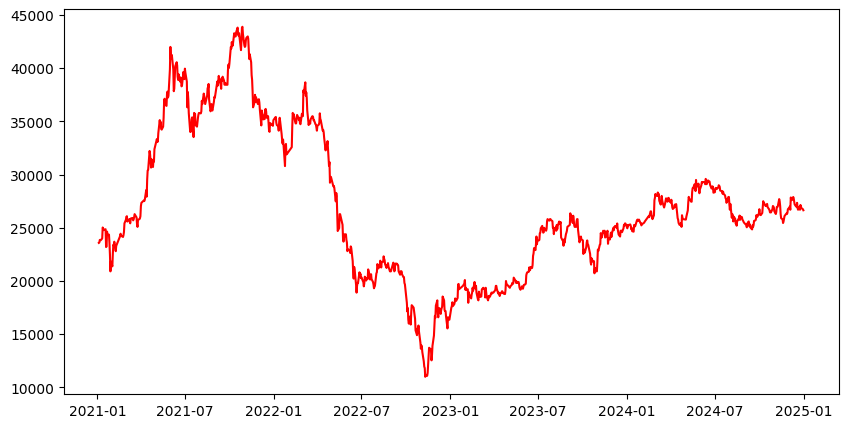

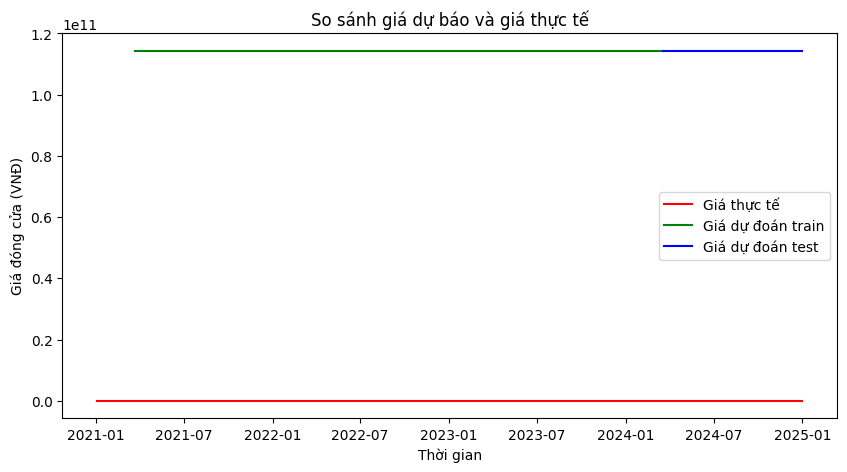

In [181]:
plt.figure(figsize=(10,5))

# Vẽ dữ liệu thực tế
plt.plot(df1, label='Giá thực tế', color='red')

plt.figure(figsize=(10,5))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [183]:
print(y_test_predict[:10]) # Assuming you want to print the first 10 predicted values from the test set.


[[1.1436431e+11]
 [1.1436431e+11]
 [1.1436431e+11]
 [1.1436431e+11]
 [1.1436431e+11]
 [1.1436431e+11]
 [1.1436431e+11]
 [1.1436431e+11]
 [1.1436431e+11]
 [1.1436431e+11]]
